# EX-1: Set Cover Problem

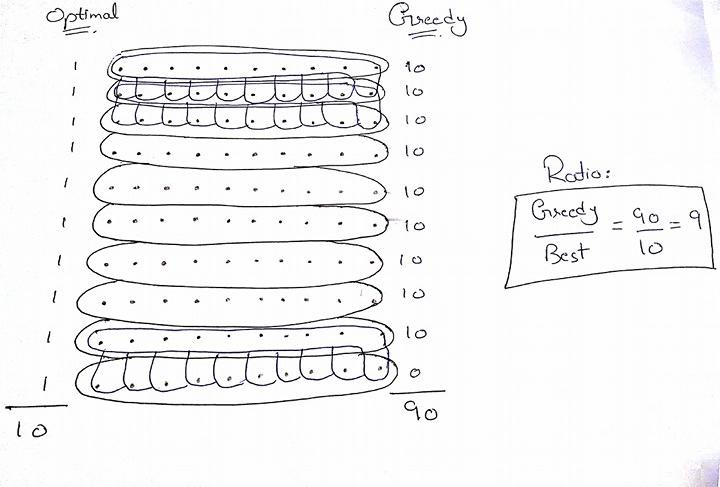

In [107]:
from IPython.display import Image
Image(filename='setProblem.jpg')

### Description:

The greedy approach in set cover problem says that we should always pick the larger set but this is not an optimal solution. For example lets consider the above figure. There are 10 x 10 = 100 points shown above. On the left hand side I have shown the optimal number of sets which we can choose in order to cover all 100 points. There are minimum 10 sets in which we can cover these point i.e every row as a set.
Now according to greedy we must always choose the larger set. So for every row I have constructed 10 sets of size 11. So greedy will always ignore the sets of size 10 and pick the sets of size 11. On the right hand side we can see that greedy picked 10 sets for every row except the last row which is already covered while selecting operating on the 9th row. So in total greedy took 90 sets.

So,
                    Greedy/Optimal = 90/10 = 9 
                    which the best I got from 100 points

# EX-2 EX-3 & EX-4: A* Algorithm with visualization

### Description:

A* is a shortest path algorithm that finds the shortest path by choosing the neighbour node which has the less score value considering the goal. I used the numpy grid to populate the environment which was given in the question in which first I initialized the grid with zero's i.e the walkable path, and then i made the swog shapes of swamps, seas, and walls.

Here,
* 1-Green (Swamp) 2x slower
* 2-Light_Blue (Sea) 4x slower
* 3-Pink Block
* 4-Starting Point
* 5-Ending Point

The Heuristic function takes in the corresponding neighbours and retunrs the neighbour score for the corresponding grid cell. Here the score is the Euclidean distance. I multiplied the this score by 2 in case of swamp cell and In case of Sea I multiplied it by 4 so that the score of these cells will increase and A* will take in account the score value while traversing the grid.

The final solution is plotted by matplot but I took the screensshot and rotated the output because matplot axis are different from those in SWOG.


## Grid Setup (According to Swog Coordinates)

In [247]:
import math
import matplotlib.pyplot as plt

n=1000
grid = numpy.zeros((n,n))


#1-Green (Swamp) 2x slower
#2-Light_Blue (Sea) 4x slower
#3-Pink Block
#4-Starting Point
#5-Ending Point

# Function for LineSegment
def get_line(x1, y1, x2, y2):
    points = []
    issteep = abs(y2-y1) > abs(x2-x1)
    if issteep:
        x1, y1 = y1, x1
        x2, y2 = y2, x2
    rev = False
    if x1 > x2:
        x1, x2 = x2, x1
        y1, y2 = y2, y1
        rev = True
    deltax = x2 - x1
    deltay = abs(y2-y1)
    error = int(deltax / 2)
    y = y1
    ystep = None
    if y1 < y2:
        ystep = 1
    else:
        ystep = -1
    for x in range(x1, x2 + 1):
        if issteep:
            points.append((y, x))
        else:
            points.append((x, y))
        error -= deltay
        if error < 0:
            y += ystep
            error += deltax
    if rev:
        points.reverse()
    return points

# Make swamps, walls and sea in the grid (Circles, squares)

for i in range(0,n):
    for j in range(0,n):
        
        
        val=(math.pow((79-i),2))+(math.pow((919-j),2))
        if(val<64):
            grid[i][j]=4
            continue  
            
        val=(math.pow((799-i),2))+(math.pow((79-j),2))
        if(val<64):
            grid[i][j]=5
            continue  
        
        val=(math.pow((599-i),2))+(math.pow((349-j),2))
        if(val<40000):
            grid[i][j]=1
            continue        
        
        val=(math.pow((249-i),2))+(math.pow((449-j),2))
        if(val<4900):
            grid[i][j]=2
            continue

        val=(math.pow((149-i),2))+(math.pow((349-j),2))
        if(val<6400):
            grid[i][j]=2
            continue

        val=(math.pow((549-i),2))+(math.pow((719-j),2))
        if(val<22500):
            grid[i][j]=3
            continue

        if(i>=149 and i<=349 and j<=799 and j>=599):
            grid[i][j]=3
            continue

            
line0=get_line(550,50,950,150)
line1=get_line(551,51,951,151)
line2=get_line(549,49,949,149)
        
## Making 3 lines because A* jumped the single line with 2-steps

for i,j in line0:
    grid[i][j]=3
for i,j in line1:
    grid[i][j]=3
for i,j in line2:
    grid[i][j]=3
                        

## Initial Grid: (Image by Matplot)

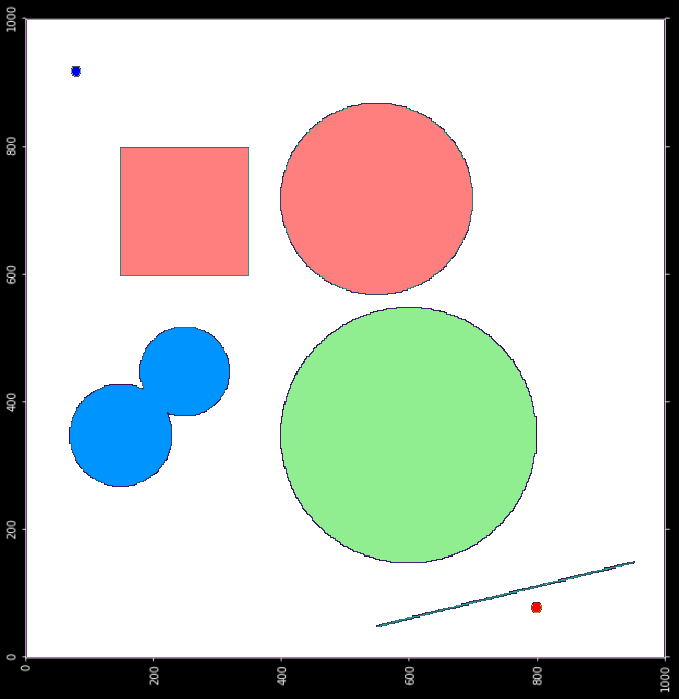

In [176]:
from IPython.display import Image
Image(filename='pathfinder0.png')

## A* in Action

### Code Reference:  
http://code.activestate.com/recipes/578919-python-a-pathfinding-with-binary-heap/

In [248]:
# Author: Christian Careaga (christian.careaga7@gmail.com)
# A* Pathfinding in Python (2.7)

import numpy
from heapq import *

# My Custom heuristic for euclidean distance , swamp and sea.
def heuristic(a, b, array=None):
    if(array is not None):
        if 0 <= b[0] < array.shape[0]:
            if 0 <= b[1] < array.shape[1]:
                if array[b[0]][b[1]] == 1:
                    #print('2x slower')
                    return int((((b[0] - a[0]) ** 2 + (b[1] - a[1]) ** 2))*2)
                if array[b[0]][b[1]] == 2:
                    #print('4x slower')
                    return int((((b[0] - a[0]) ** 2 + (b[1] - a[1]) ** 2))*4)
                else:
                    return int(((b[0] - a[0]) ** 2 + (b[1] - a[1]) ** 2))

    return int(((b[0] - a[0]) ** 2 + (b[1] - a[1]) ** 2))

def astar(array, start, goal):

#     neighbors = [(0,1),(0,-1),(1,0),(-1,0),(1,1),(1,-1),(-1,1),(-1,-1)]
    neighbors = [(0,2),(0,-2),(-1,-2),(-1,2),(1,-2),(1,2),(-2,-2),(-2,-1),(-2,-0),(-2,1),(-2,2),(2,-2),(2,-1),(2,0),(2,1),(2,2)]

    close_set = set()
    came_from = {}
    gscore = {start:0}
    fscore = {start:heuristic(start, goal, array)}
    oheap = []

    heappush(oheap, (fscore[start], start))
    
    while oheap:

        current = heappop(oheap)[1]

        if current == goal:
            data = []
            while current in came_from:
                data.append(current)
                current = came_from[current]
            return data

        close_set.add(current)
        for i, j in neighbors:
            neighbor = current[0] + i, current[1] + j            
            tentative_g_score = gscore[current] + heuristic(current, neighbor,array)
            if 0 <= neighbor[0] < array.shape[0]:
                if 0 <= neighbor[1] < array.shape[1]:                
                    if array[neighbor[0]][neighbor[1]] == 3:
                        continue
                else:
                    # array bound y walls
                    continue
            else:
                # array bound x walls
                continue
                
            if neighbor in close_set and tentative_g_score >= gscore.get(neighbor, 0):
                continue
                
            if  tentative_g_score < gscore.get(neighbor, 0) or neighbor not in [i[1]for i in oheap]:
                came_from[neighbor] = current
                gscore[neighbor] = tentative_g_score
                fscore[neighbor] = tentative_g_score + heuristic(neighbor, goal)
                heappush(oheap, (fscore[neighbor], neighbor))
                
    return False

path=[]         
path= astar(grid, (80,920), (800,78))
for i in range(len(path)):
    #print(path[i])#The path by astar 
    x,y=path[i]
    grid[x][y]=6



In [252]:
print('Length of the Shortest path = %d'%path)

Length of the Shortest path = 610


## A* Line Tracing: (Image by Matplot) 

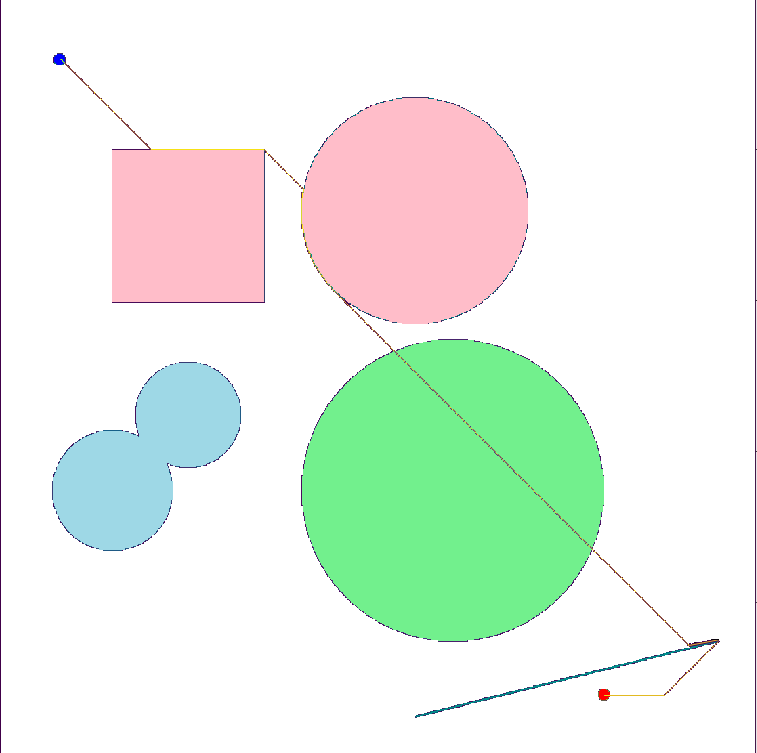

In [253]:
from IPython.display import Image
Image(filename='pathfinder1.png')

## Custom Shapes:

In [235]:
import matplotlib.pyplot as plt

n=1000
grid = numpy.zeros((n,n))


#1-Green (Swamp) 2x slower
#2-Light_Blue (Sea) 4x slower
#3-Pink Block
#4-Starting Point
#5-Ending Point

# Function for LineSegment
def get_line(x1, y1, x2, y2):
    points = []
    issteep = abs(y2-y1) > abs(x2-x1)
    if issteep:
        x1, y1 = y1, x1
        x2, y2 = y2, x2
    rev = False
    if x1 > x2:
        x1, x2 = x2, x1
        y1, y2 = y2, y1
        rev = True
    deltax = x2 - x1
    deltay = abs(y2-y1)
    error = int(deltax / 2)
    y = y1
    ystep = None
    if y1 < y2:
        ystep = 1
    else:
        ystep = -1
    for x in range(x1, x2 + 1):
        if issteep:
            points.append((y, x))
        else:
            points.append((x, y))
        error -= deltay
        if error < 0:
            y += ystep
            error += deltax
    if rev:
        points.reverse()
    return points

# Make swamps, walls and sea in the grid (Circles, squares)

for i in range(0,n):
    for j in range(0,n):
        
        
        val=(math.pow((79-i),2))+(math.pow((919-j),2))
        if(val<64):
            grid[i][j]=4
            continue  
            
        val=(math.pow((799-i),2))+(math.pow((79-j),2))
        if(val<64):
            grid[i][j]=5
            continue  
        
        val=(math.pow((599-i),2))+(math.pow((349-j),2))
        if(val<40000):
            grid[i][j]=1
            continue        
        
        val=(math.pow((249-i),2))+(math.pow((449-j),2))
        if(val<4900):
            grid[i][j]=2
            continue

        val=(math.pow((149-i),2))+(math.pow((349-j),2))
        if(val<400):
            grid[i][j]=2
            continue
        
        
        val=(math.pow((150-i),2))+(math.pow((550-j),2))
        if(val<2500):
            grid[i][j]=3
            continue
            
        val=(math.pow((500-i),2))+(math.pow((450-j),2))
        if(val<2500):
            grid[i][j]=3
            continue
            
            
        val=(math.pow((149-i),2))+(math.pow((349-j),2))
        if(val<3600):
            grid[i][j]=2
            continue        
            
        val=(math.pow((549-i),2))+(math.pow((719-j),2))
        if(val<22500):
            grid[i][j]=3
            continue
            

        if(i>=149 and i<=349 and j<=799 and j>=599):
            grid[i][j]=3
            continue
        
        if(i>=220 and i<=900 and j<=599 and j>=199):
            grid[i][j]=3
            continue
            
            
line0=get_line(550,50,950,150)
line1=get_line(551,51,951,151)
line2=get_line(549,49,949,149)
        
## Making 3 lines because A* jumped the single line with 2-steps

for i,j in line0:
    grid[i][j]=3
for i,j in line1:
    grid[i][j]=3
for i,j in line2:
    grid[i][j]=3
    
    


In [237]:
path=[]         
path= astar(grid, (80,920), (800,78))
for i in range(len(path)):
    #print(path[i])#The path by astar 
    x,y=path[i]
    grid[x][y]=6

### Custom changes (Image by matplotlib

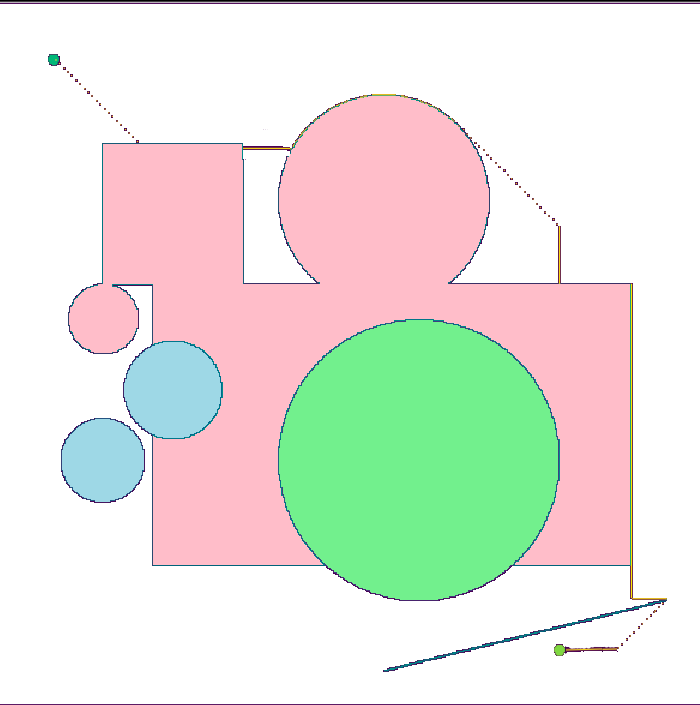

In [256]:
from IPython.display import Image
Image(filename='pathfinder4.png')

# EX-5: Random Walk with Probabilistic Adjacency Matrix

This is not complete.. But I calculated the baised probabilities and their adjacency matrix.
We should stop multiplying the adjacency matrix of probabilities when the matrix converges to zero values by the result of multiplication.
Also I have added some new nodes in the previous homework graph to avoid dead ends as suggested in the question

In [287]:
import numpy as np
import networkx as nx
import random
from collections import defaultdict


#---------------------------------------------------------------------


def prob_distribution(n, p=1):
    if n == 1:
        return [p]
    elif n < 1:
        return None
    
    probs = [p] 
    for i in range(n-1):
        pp = probs.pop()
        frac = pp/3
        probs.append(pp - frac)
        probs.append(frac)
    return probs


#--------------------------------------------------------------------


graph = nx.DiGraph()
graph.add_edges_from([(0, 1), (0, 5), (2, 1), (2, 4), (2, 6), (3, 2), (4, 7), (4, 10),
                  (5, 4), (6, 4), (6, 9), (7, 5), (8, 6), (9, 8), (10, 4), (6,7), (1,10),(10,6)])
# Added 3 edges to avoid deadends
graph_adjaceny_list = defaultdict(list)
for (i, j) in graph.edges():
    graph_adjaceny_list[i].append(j)
    
adjacency = [[0]*len(G.nodes()) for _ in range(len(graph.nodes()))]
for n in graph.nodes():
    links = [x[1] for x in graph.edges(n)]
    probs = uneven_probs(len(links))
    for i, nn in enumerate(sorted(links)):
        adjacency[n][nn] = probs[i]

prob_Adjacency = np.asmatrix(adjacency)
print(prob_Adjacency)
print(prob_Adjacency*prob_Adjacency)

[[ 0.          0.66666667  0.          0.          0.          0.33333333
   0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          1.        ]
 [ 0.          0.66666667  0.          0.          0.22222222  0.
   0.11111111  0.          0.          0.          0.        ]
 [ 0.          0.          1.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.66666667  0.          0.          0.33333333]
 [ 0.          0.          0.          0.          1.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.66666667  0.          0.
   0.22222222  0.          0.11111111  0.        ]
 [ 0.          0.          0.          0.          0.          1.          0.
   0.      

In [289]:

#print("\n\n------------------------------------------------------------------------------------\n\n")
G_dict=graph_adjaceny_list

def probabilistic_Random(dic, initial, path=[], last=random.choice(list(G_dict))):
    path.append(initial)

    if initial == last or len(path) >= 900:
        return path
    elif initial not in dic.keys():
        up_node = random.choice(list(G_dict))
    else:
        pval = random.randint(1, 10)
#         print(initial)
#         print(dic[initial])
        #print(prob_Adjacency[initial][dic[initial]])
#         for i in prob_Adjacency[initial][0]:
#             print(i)
           
        
        if len(dic[initial]) != 0 and pval > 2:
            up_node = dic[initial][random.randint(0, len(dic[initial]) - 1)]
        elif len(dic[initial]) != 0 and pval < 3:
            up_node = random.choice(list(G_dict))
            while up_node == initial:
                up_node = random.choice(list(G_dict))
        else:
            up_node = random.choice(list(G_dict))
            while up_node == initial:
                up_node = random.choice(list(G_dict))

    probabilistic_Random(G_dict, up_node)
    return path


myinitial = random.choice(list(graph_adjaceny_list))


probabilistic_walk = probabilistic_Random(graph_adjaceny_list, myinitial)
# for elem in probabilistic_walk:
#     print(elem)
print("Probabilistic Walk:\n")
print(probabilistic_walk)

Probabilistic Walk:

[4, 10, 4, 7, 1, 10, 2, 4, 10, 6, 4, 10, 4, 8, 6, 4, 10, 2, 6, 4, 7, 5]
